In [ ]:
import numpy as np

class LaplaceSolver:
    def __init__(self, nx, ny, xmax, ymax, method='jacobi', tol=1e-4, max_iter=1000):
        self.nx = nx
        self.ny = ny
        self.xmax = xmax
        self.ymax = ymax
        self.method = method
        self.tol = tol
        self.max_iter = max_iter

        self.dx = xmax / (nx - 1)
        self.dy = ymax / (ny - 1)

        self.x = np.linspace(0, xmax, nx)
        self.y = np.linspace(0, ymax, ny)

        self.u = np.zeros((ny, nx))
        self.u[0, :] = self.y * (self.ymax - self.y)  # boundary condition at y=0
        self.u[-1, :] = self.y * (self.ymax - self.y)  # boundary condition at y=ymax
        self.u[:, 0] = self.x * (self.xmax - self.x)  # boundary condition at x=0
        self.u[:, -1] = self.x * (self.xmax - self.x)  # boundary condition at x=xmax

    def solve(self):
        if self.method == 'jacobi':
            self._solve_jacobi()
        elif self.method == 'gauss_seidel':
            self._solve_gauss_seidel()
        else:
            raise ValueError(f"Invalid method: {self.method}")

    def _solve_jacobi(self):
        for k in range(self.max_iter):
            u_new = np.zeros_like(self.u)

            # iterate over interior points
            for j in range(1, self.ny - 1):
                for i in range(1, self.nx - 1):
                    u_new[j, i] = (self.u[j, i-1] + self.u[j, i+1] +
                                   self.u[j-1, i] + self.u[j+1, i]) / 4

            # check convergence
            err = np.abs(u_new - self.u).max()
            if err < self.tol:
                break

            self.u = u_new

    def _solve_gauss_seidel(self):
        for k in range(self.max_iter):
            # iterate over interior points
            for j in range(1, self.ny - 1):
                for i in range(1, self.nx - 1):
                    self.u[j, i] = (self.u[j, i-1] + self.u[j, i+1] +
                                    self.u[j-1, i] + self.u[j+1, i]) / 4

            # check convergence
            err = np.abs(self.residual()).max()
            if err < self.tol:
                break

    def residual(self):
        res = np.zeros_like(self.u)
        res[1:-1, 1:-1] = (self.u[1:-1, :-2] + self.u[1:-1, 2:] +
                           self.u[:-2, 1:-1] + self.u[2:, 1:-1] -
                           4 * self.u[1:-1, 1:-1]) / (self.dx ** 2 + self.dy ** 2)
        return res

In [ ]:
import numpy as np

class LaplaceSolver:
    def __init__(self, nx, ny, xmax, ymax, tolerance):
        self.nx = nx    # number of grid points in the x direction
        self.ny = ny    # number of grid points in the y direction
        self.xmax = xmax    # maximum x value
        self.ymax = ymax    # maximum y value
        self.dx = xmax/(nx-1)    # grid spacing in the x direction
        self.dy = ymax/(ny-1)    # grid spacing in the y direction
        self.tolerance = tolerance    # tolerance for convergence
        self.phi = np.zeros((nx,ny))    # initial guess for the potential

    def update_phi(self):
        for i in range(1,self.nx-1):
            for j in range(1,self.ny-1):
                self.phi[i,j] = (self.phi[i+1,j] + self.phi[i-1,j] + 
                                self.phi[i,j+1] + self.phi[i,j-1])/4
            
    def is_converged(self):
        max_residual = np.max(np.abs(self.phi[1:-1,1:-1] - 
                                    (self.phi[2:,1:-1] + self.phi[:-2,1:-1] +
                                    self.phi[1:-1,2:] + self.phi[1:-1,:-2])/4))
        return max_residual < self.tolerance
    
    def solve(self):
        while not self.is_converged():
            self.update_phi()

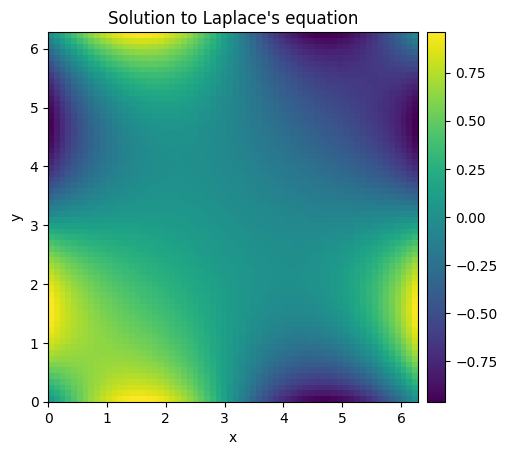

Help on class CartesianGrid in module pde.grids.cartesian:

class CartesianGrid(pde.grids.base.GridBase)
 |  CartesianGrid(bounds: 'Sequence[Tuple[float, float]]', shape: 'Union[int, Sequence[int]]', periodic: 'Union[Sequence[bool], bool]' = False)
 |  
 |  d-dimensional Cartesian grid with uniform discretization for each axis
 |  
 |  The grids can be thought of as a collection of n-dimensional boxes, called cells, of
 |  equal length in each dimension. The bounds then defined the total volume covered by
 |  these cells, while the cell coordinates give the location of the box centers. We
 |  index the boxes starting from 0 along each dimension. Consequently, the cell
 |  :math:`i-\frac12` corresponds to the left edge of the  covered interval and the
 |  index :math:`i+\frac12` corresponds to the right edge, when the dimension is covered
 |  by d boxes.
 |  
 |  In particular, the discretization along dimension :math:`k` is defined as
 |  
 |  .. math::
 |          x^{(k)}_i &= x^{(k)}

In [3]:
import numpy as np

from pde import CartesianGrid, solve_laplace_equation

grid = CartesianGrid([[0, 2 * np.pi]] * 2, 64)
bcs = [{"value": "sin(y)"}, {"value": "sin(x)"}]

res = solve_laplace_equation(grid, bcs)
res.plot()
help(CartesianGrid)

